In [13]:
import pandas as pd
data = pd.read_csv(r"D:\Excel\heart.csv")

In [14]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
data.shape

(918, 12)

In [16]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

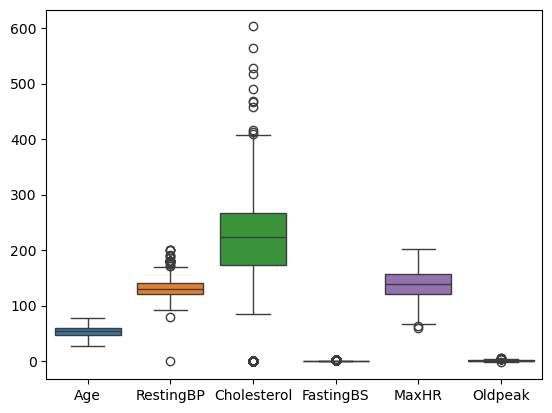

In [18]:
import seaborn as sns
sns.boxplot(data = data[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])


**Remove outliers** 

In [19]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df_clean = data.copy()

for col in columns:
    df_clean = remove_outliers(df_clean, col)  


<Axes: >

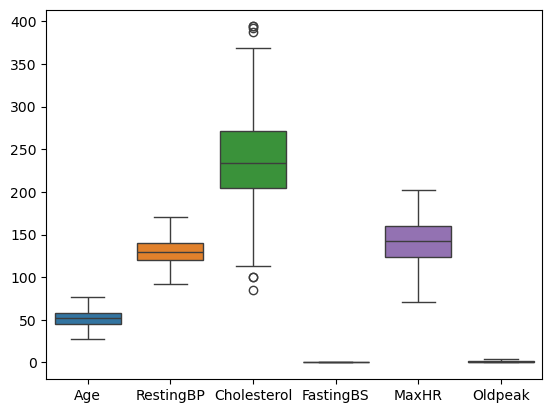

In [20]:
import seaborn as sns
sns.boxplot(data = df_clean[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])


In [21]:
df_clean.shape

(587, 12)

In [22]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
category_col =['ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [24]:
def unique_val(df_clean, col):
    return df_clean[col].unique()
for cl in category_col:
    print(f'{cl} : {unique_val(df_clean,cl)}')

ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
cp = LabelEncoder()
re = LabelEncoder()
ss = LabelEncoder()
ea = LabelEncoder()
df_clean['ChestPainType'] = cp.fit_transform(df_clean['ChestPainType'])
df_clean['RestingECG'] = re.fit_transform(df_clean['RestingECG'])
df_clean['ST_Slope'] = ss.fit_transform(df_clean['ST_Slope'])
df_clean['ExerciseAngina'] = ea.fit_transform(df_clean['ExerciseAngina'])

In [26]:
df_clean['Sex'].replace({'M':0,'F':1}, inplace=True)

C:\Users\91701\AppData\Local\Temp\ipykernel_20096\2758494975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Sex'].replace({'M':0,'F':1}, inplace=True)
C:\Users\91701\AppData\Local\Temp\ipykernel_20096\2758494975.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Sex'].repla

In [27]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,1,0,140,241,0,1,123,1,0.2,1,1
913,45,0,3,110,264,0,1,132,0,1.2,1,1
915,57,0,0,130,131,0,1,115,1,1.2,1,1
916,57,1,1,130,236,0,0,174,0,0.0,1,1


In [28]:
X = df_clean.drop(['HeartDisease'], axis=1)
y = df_clean.HeartDisease

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [30]:
X_scaler

array([[-1.22843334, -0.59112206,  0.1486283 , ..., -0.7353111 ,
        -0.83311757,  0.91651243],
       [-0.2852836 ,  1.69169799,  1.21258944, ..., -0.7353111 ,
         0.20805768, -0.83021743],
       [-1.54281658, -0.59112206,  0.1486283 , ..., -0.7353111 ,
        -0.83311757,  0.91651243],
       ...,
       [ 0.55307172, -0.59112206, -0.91533283, ...,  1.35996859,
         0.41629273, -0.83021743],
       [ 0.55307172,  1.69169799,  0.1486283 , ..., -0.7353111 ,
        -0.83311757, -0.83021743],
       [-1.43802216, -0.59112206,  1.21258944, ..., -0.7353111 ,
        -0.83311757,  0.91651243]])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X_scaler,y, test_size=0.2, random_state=20)

In [32]:
x_train.shape

(469, 11)

In [33]:
x_test.shape

(118, 11)

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_para = {
    'svm':{
        'model':SVC(gamma='auto'),
        'param':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
            }
        },
    'randomforest':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[1,5,10,15,20]
        }
    },

    'logistic':{
        'model':LogisticRegression(),
        'param':{
            'C':[1,5,10,15,20]
        }
    }
}

In [35]:
from sklearn.model_selection import GridSearchCV
list=[]
for model_name, mp in model_para.items():
    clf=GridSearchCV(mp['model'], mp['param'],cv=5,return_train_score=True)
    clf.fit(X_scaler,y)
    list.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [36]:
data=pd.DataFrame(list)
data

,model,best_score,best_params
0,svm,0.851615,"{'C': 1, 'kernel': 'rbf'}"
1,randomforest,0.843054,{'n_estimators': 5}
2,logistic,0.841431,{'C': 1}


In [37]:
model =RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
model.score(x_test,y_test)

0.8813559322033898

In [39]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
y_test

917    0
14     0
622    1
67     0
261    0
      ..
106    0
82     1
35     0
64     0
661    1
Name: HeartDisease, Length: 118, dtype: int64

Text(50.722222222222214, 0.5, 'True value')

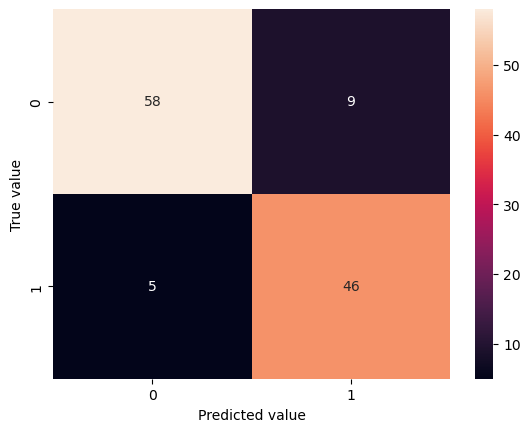

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')


In [43]:
import joblib
joblib.dump(model, "heart_disease_model.pkl")

['heart_disease_model.pkl']